### Piston model:


# $P = \frac{2\cdot p_0}{\mathbf{\overrightarrow{tp}}} \cdot \frac{J_1(k\cdot r\cdot \textrm{sin}\theta)}{k\cdot r\cdot \textrm{sin}\theta}\cdot e^{(i\cdot k\cdot \mathbf{\overrightarrow{tp}})}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from functions import points_vector_builder
from plotting_functions import *
from PM_functions import *

In [6]:
# ---> physics params <---
c0 = 343.  # [m/s]
v = 40000  # [Hz]
lam = c0 / v  # [m]
k = 2 * np.pi / lam  # [rads/m]
resolution = 4

# ----> AMM plane <----
m_AMM, n_AMM = 12, 12
dx_AMM =  lam/2 # diameter of metamaterial elements
AMM_centrepoint = (0, 0, 0)
AMM_sidelengths = [((m_AMM/2)*dx_AMM, (m_AMM/2)*dx_AMM), ((n_AMM/2)*dx_AMM, (n_AMM/2)*dx_AMM), (0, 0)]
AMM_points = points_vector_builder(AMM_centrepoint, AMM_sidelengths, dx_AMM)

# ----> transducer plane <----
m_tran, n_tran = 1, 1
dx_tran =  10.5/1000 # diameter of a transducer [m] (actually, they are 10mm in diameter, with a spacing of 0.5mm)
tran_centrepoint = (-3*lam, 0, 8*lam)
tran_sidelengths = [((m_tran/2)*dx_tran, (m_tran/2)*dx_tran), ((n_tran/2)*dx_tran, (n_tran/2)*dx_tran), (0, 0)]
tran_points = points_vector_builder(tran_centrepoint, tran_sidelengths, dx_tran)

tran_normal = np.array([AMM_centrepoint[0] - tran_centrepoint[0],
                        AMM_centrepoint[1] - tran_centrepoint[1],
                        AMM_centrepoint[2] - tran_centrepoint[2]])

# ----> xz_eval plane <----
dx_xz_eval = dx_AMM/resolution
xz_eval_centrepoint = (0, 0, 5*lam)
xz_eval_sidelengths = [(5*lam, 5*lam), (0, 0), (5*lam, 5*lam)] # [(-x, +x), (-y, +y), (-z, +z)]

xz_eval_points = points_vector_builder(xz_eval_centrepoint, xz_eval_sidelengths, dx_xz_eval)

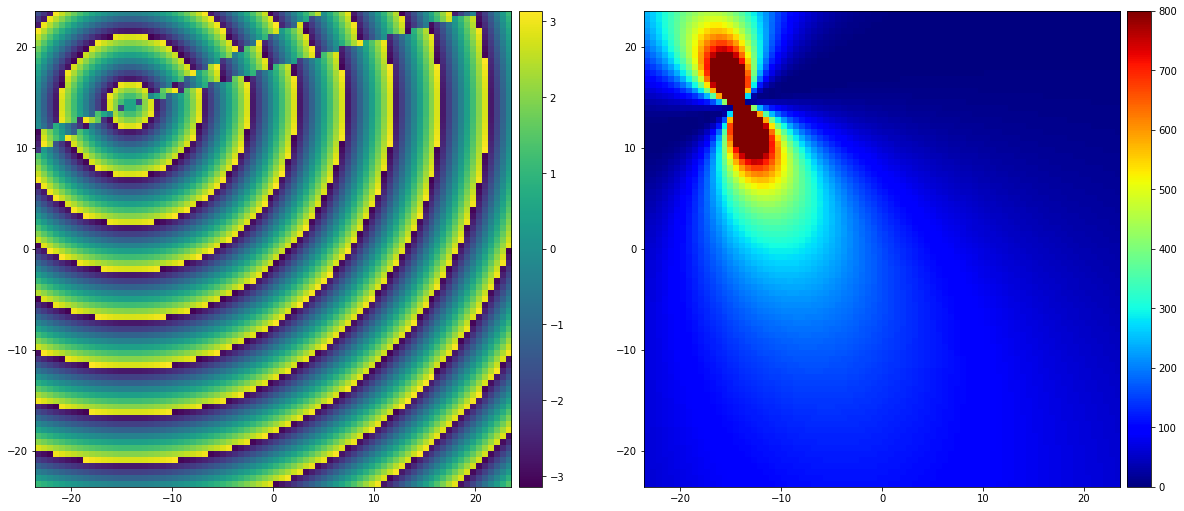

In [7]:
tp_vec = find_tp_vec(xz_eval_points, tran_points)
tp_mag = vmag3D(tp_vec.T).reshape(1, -1)
sin_theta = find_sin_theta(tp_vec, tran_normal)
H = PM_propagator_function_builder(tp_mag, sin_theta, k) # propagator

A_magnitude = 1
Pt = A_magnitude*np.ones((m_tran*n_tran))*np.exp(1j*np.zeros((m_tran*n_tran))) # transducer complex pressure
Pf = np.dot(Pt, H).reshape(pf_shape(xz_eval_sidelengths, resolution, lam)) # propagate to far field and reshape to array
Pf = np.flipud(Pf)

fig, ax = basic_plotter(nrows=1, ncols=2,
                            figsize = (20, 10),
                            plottable_list = [np.angle(Pf), abs(Pf)],
                            cmap_list = [plt.get_cmap("viridis"), plt.get_cmap("jet")],
                            vmax_list = [np.pi, 800],
                            vmin_list = [-np.pi, 0],
                            points_list = [AMM_points, AMM_points])

plt.show()

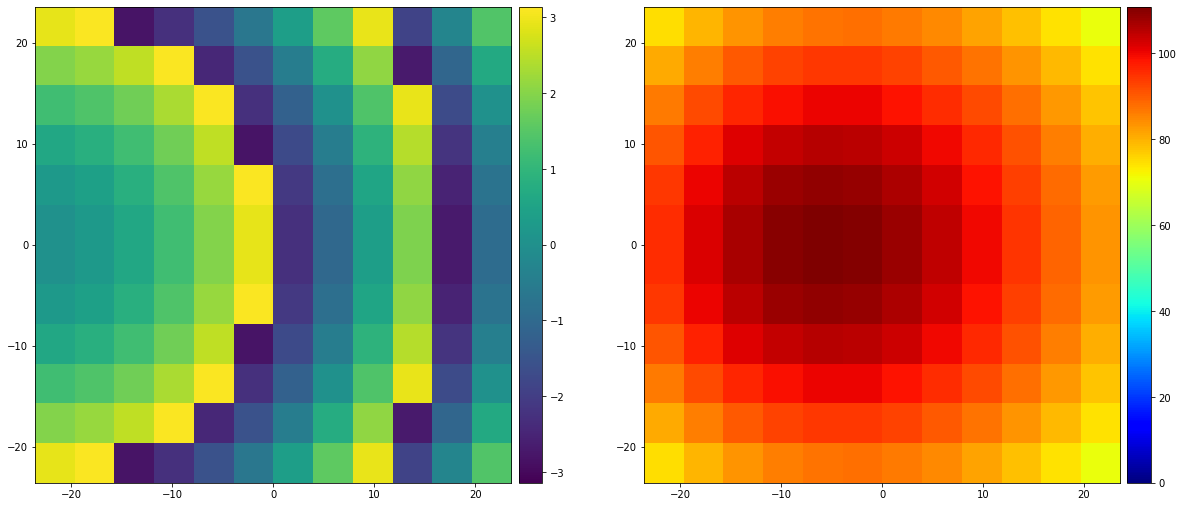

In [8]:
tp_vec = find_tp_vec(AMM_points, tran_points)
tp_mag = vmag3D(tp_vec.T).reshape(1, -1)
sin_theta = find_sin_theta(tp_vec, tran_normal)
H = PM_propagator_function_builder(tp_mag, sin_theta, k) # propagator

A_magnitude = 1
Pt = A_magnitude*np.ones((m_tran*n_tran))*np.exp(1j*np.zeros((m_tran*n_tran))) # transducer complex pressure
Pf = np.dot(Pt, H).reshape(pf_shape(AMM_sidelengths, 1, lam)) # propagate to far field and reshape to array
Pf = np.flipud(Pf)

fig, ax = basic_plotter(nrows=1, ncols=2,
                            figsize = (20, 10),
                            plottable_list = [np.angle(Pf), abs(Pf)],
                            cmap_list = [plt.get_cmap("viridis"), plt.get_cmap("jet")],
                            vmax_list = [np.pi, np.amax(abs(Pf))],
                            vmin_list = [-np.pi, 0],
                            points_list = [AMM_points, AMM_points])

plt.show()